In [1]:
# @toffanetto

import k_nn_classification as knn 
import matplotlib.pyplot as plt
import numpy as np


/home/toffanetto/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Getting train data
X_train, y_train, classes_rate_train = knn.getData(train=True, raw= False)

Y_data = [X_train, y_train]

# Getting test data
X_test, y_test, classes_rate_test = knn.getData(train=False, raw= False)

Y_test = [X_test, y_test]

In [3]:
#k, ba = knn.findBestK(x=Y_test[0], Y =Y_data, y_label=Y_test[1], classes_rate=classes_rate_test)

# np.save('../model/knn/processed_data/ba.npy', ba)

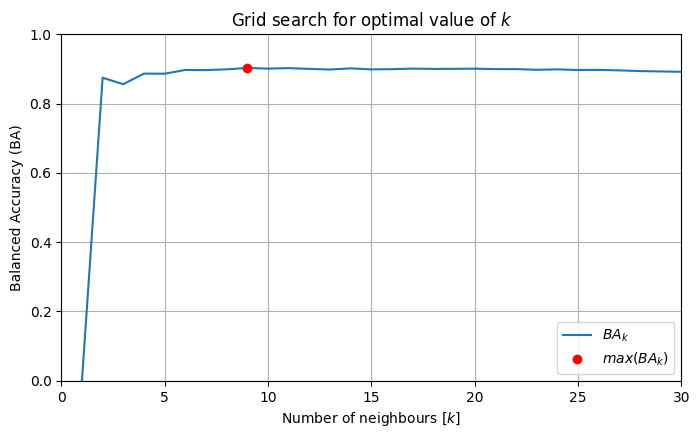

In [4]:
try:
    ba
except:
    ba = np.load('../model/knn/processed_data/ba.npy')
    k = np.argmax(ba)+1

n = np.linspace(1,30,30)

plt.figure(figsize=(8,4.5))
plt.plot(n,ba,label=f'$BA_k$')
plt.plot(k,max(ba),'or',label=f'$max(BA_k)$',linewidth=5)
plt.xlabel(f'Number of neighbours [$k$]')
plt.ylabel('Balanced Accuracy (BA)')
plt.title(f'Grid search for optimal value of $k$')
plt.legend()
plt.grid()
plt.xlim([0, 30])
plt.ylim([0, 1])

plt.savefig("../plot/knn_1/grid_search.pdf", format="pdf", bbox_inches="tight")




In [5]:
# y_hat = knn.classify(x=Y_test[0], Y=Y_data, y_label=Y_test[1], k=k)

# np.save('../model/knn/processed_data/y_hat.npy', y_hat)

In [6]:
try:
    y_hat
except:
    y_hat = np.load('../model/knn/processed_data/y_hat.npy')

confusion_matrix, ba_optimal = knn.rateModel(y=Y_test[1].T[0], y_hat=y_hat, classes_rate=classes_rate_test)

print('Confusion Matrix: \n'+str(confusion_matrix))
print('BA = '+str(ba_optimal))

Confusion Matrix: 
[[486.   1.   9.   0.   0.   0.]
 [ 42. 426.   3.   0.   0.   0.]
 [ 51.  42. 327.   0.   0.   0.]
 [  0.   4.   0. 420.  67.   0.]
 [  0.   0.   0.  51. 481.   0.]
 [  0.   0.   0.   2.   1. 534.]]
BA = 0.9028024386363712


In [12]:
score = knn.confusionMatrixExtract(confusion_matrix=confusion_matrix)

for i in range(1,7):
    print(str(i)+'\t'+str("{:.4f}".format(score[i]['Precision']))+'\t'+str("{:.4f}".format(score[i]['Recall'])))

1	0.9798	0.8394
2	0.9045	0.9006
3	0.7786	0.9646
4	0.8554	0.8879
5	0.9041	0.8761
6	0.9944	1.0000
